In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读取movielens数据集并转化成矩阵
def load_data(filepath):
    ratings_list = [i.strip().split("\t") for i in open(filepath, 'r').readlines()]
    ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
    R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
    rating_matrix = R_df.as_matrix()
    return rating_matrix

In [3]:
#读取训练集和测试集
train_path = './data/u1.base'
train_data = load_data(train_path)
test_path = './data/u1.test'
test_data = load_data(test_path)

In [4]:
#计算loss值
def get_loss(R,P,Q,K,beta):
    e = 0
    loss_num = 0
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                loss_num = loss_num +1
                e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                for k in range(K):
                    e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
    e = e/loss_num                
    return e

In [5]:
# R 训练集矩阵
# test_data 测试集矩阵
# P 分解的用户矩阵
# Q 分解的物品矩阵
# K 隐因子数量
# steps 迭代次数
# alpha 学习率
# beta 正则化项
def matrix_factorization(R,test_data,P, Q, K,steps,alpha,beta):
    
    #矩阵转置
    Q = Q.T
    
    #定义迭代次数和不同优化方法的loss值
    iteration_time = [] #迭代次数
    train_loss = [] #训练集loss值
    test_loss = [] #训练集loss值
    
    #进行迭代计算
    for step in range(steps):
        
        #对于每一个样本
        for i in range(len(R)):
            for j in range(len(R[i])):
                #假如在该位置上有数值存在，那么计算梯度并更新两个矩阵
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])


        
        iteration_time.append(step)
        train_loss.append(get_loss(R,P,Q,K,beta)) 
        test_loss.append(get_loss(test_data,P,Q,K,beta))

        if 0.001 in train_loss:
            break
            
    
    #画出loss的图像
    plt.plot(iteration_time,train_loss, label='Train Loss')
    plt.plot(iteration_time,test_loss, label='Test Loss')

    plt.title('loss')
    plt.legend()
    plt.show()
    
    return P, Q.T

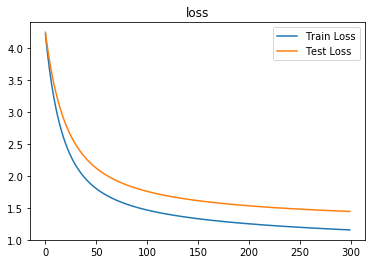

In [6]:
#用户矩阵维度
N = len(train_data)
#物品矩阵维度
M = len(train_data[0])
#隐因子数量
K = 20

#用随机数初始化用户矩阵与物品矩阵
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

#迭代轮数
steps=300
#学习率
alpha=0.00001
#正则化项
beta=0.02

#调用模型
matrix_factorization(train_data,test_data,P,Q,K,steps,alpha,beta)